In [61]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
df= pd.read_csv("/content/gdrive/MyDrive/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Exploratory Data Analysis

In [64]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Missing Values

In [65]:
  data=df.isna().sum()
  data=data.to_frame()
  data['Features']=data.index
  data.reset_index(drop=True,inplace=True)
  data.rename(columns={0:'Null Values Count'},inplace=True)
  data.head()

,Null Values Count,Features
0,19,color
1,104,director_name
2,50,num_critic_for_reviews
3,15,duration
4,104,director_facebook_likes


Text(0.5, 1.0, 'Count of Null Values of each Feature')

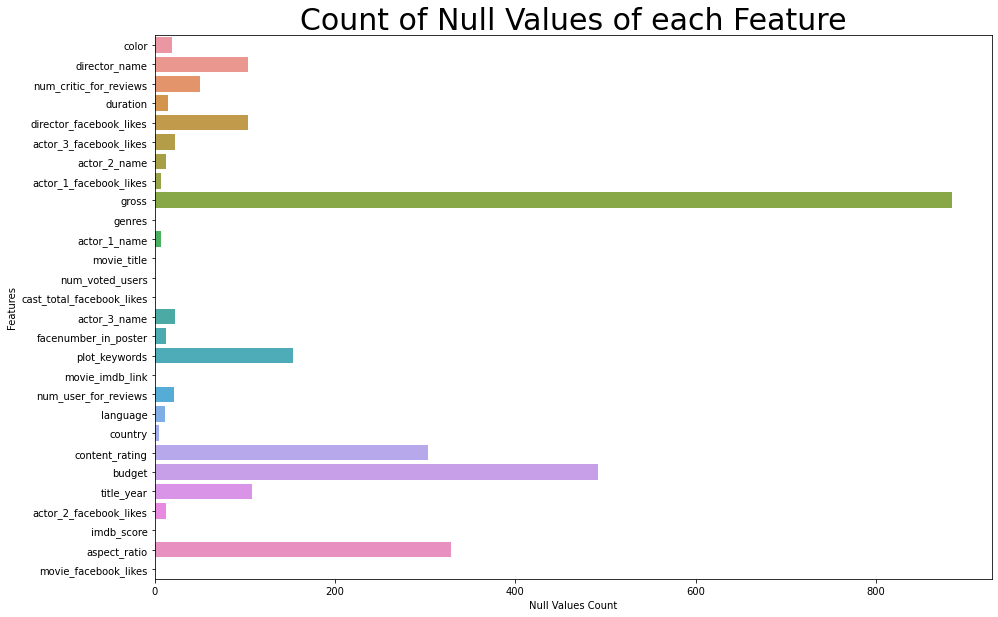

In [66]:
plt.figure(figsize=(15,10))
ax=sn.barplot(x=data['Null Values Count'],y=data['Features'])
plt.title("Count of Null Values of each Feature",fontsize=30)

In [67]:
## Dropping the rows containing null values

df.dropna(inplace=True)

## Histogram of IMDB Rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Movie Ratings')

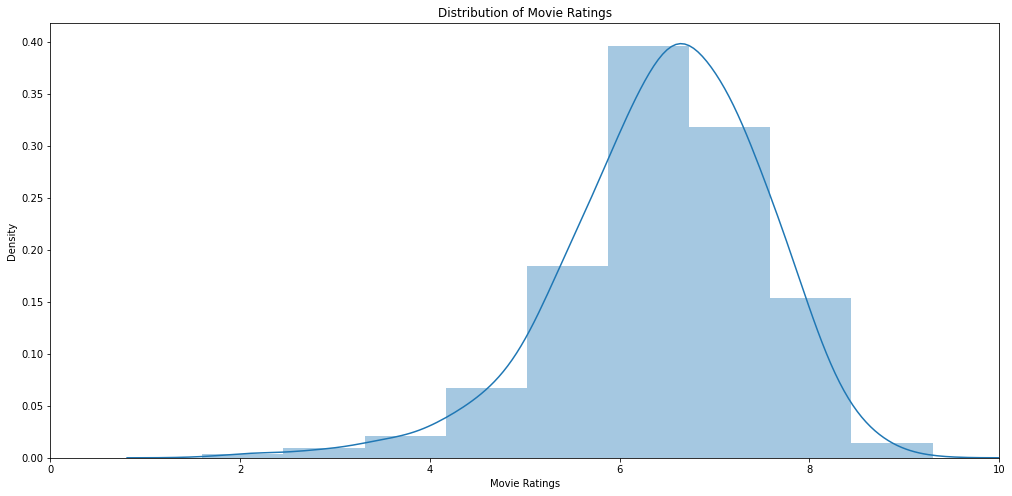

In [68]:
plt.figure(figsize=(17,8))
ax = sn.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings")

In [69]:
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]
movie_ratings = movie_ratings.dropna()

## Pair plot to check the relation between features

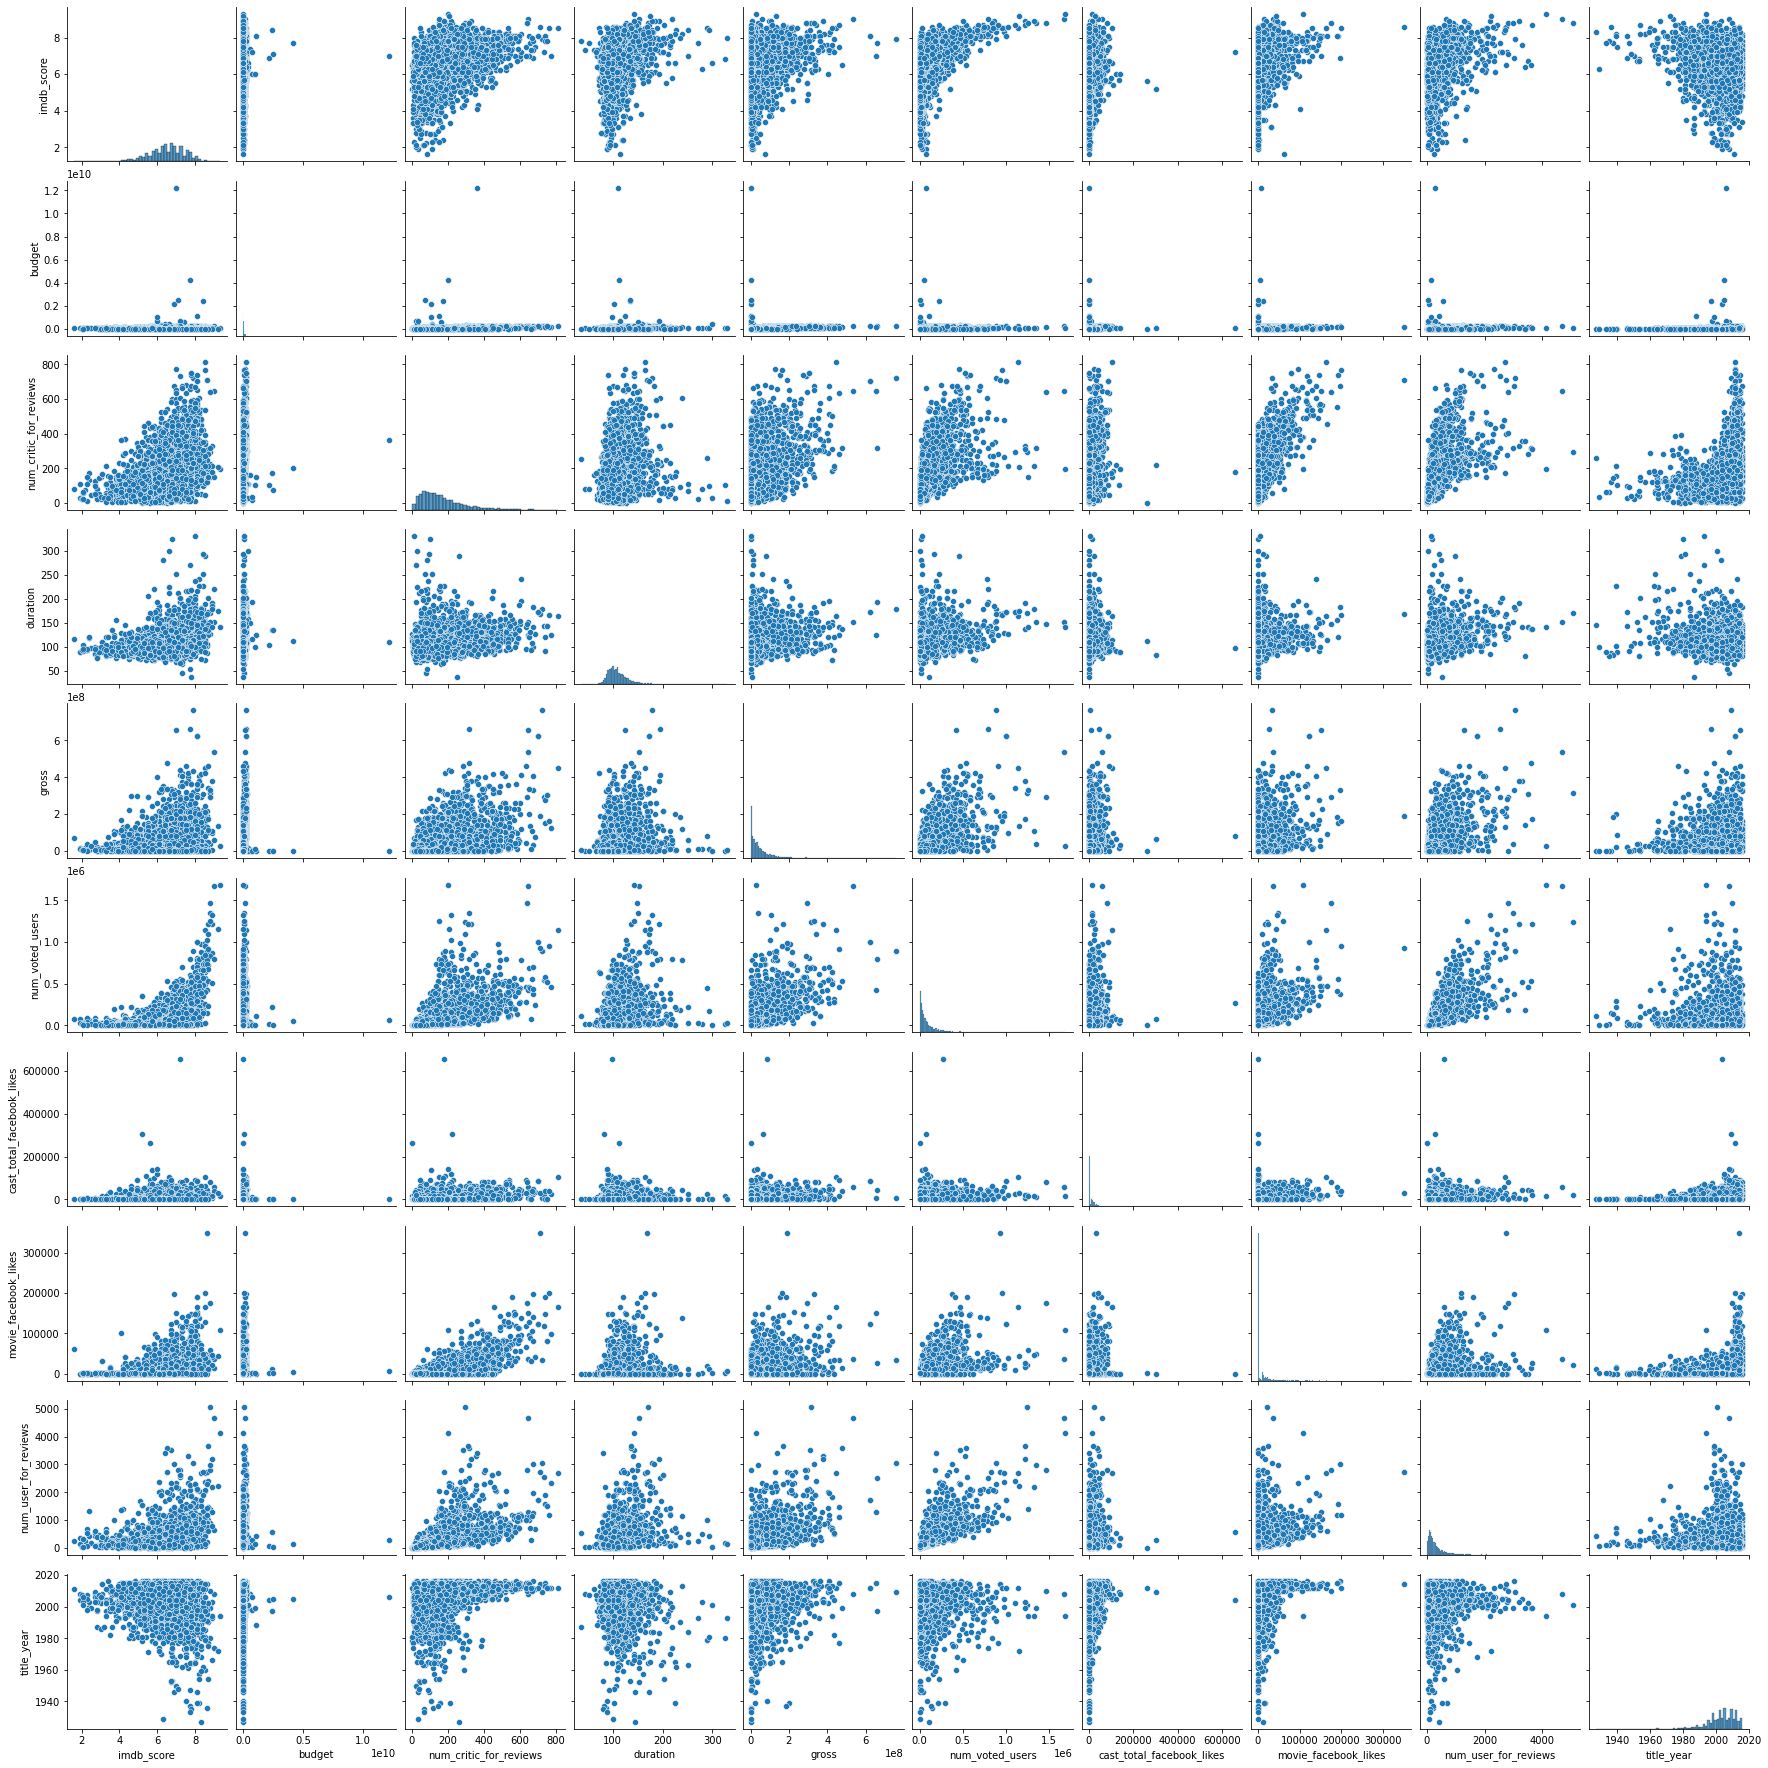

In [70]:
sn.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

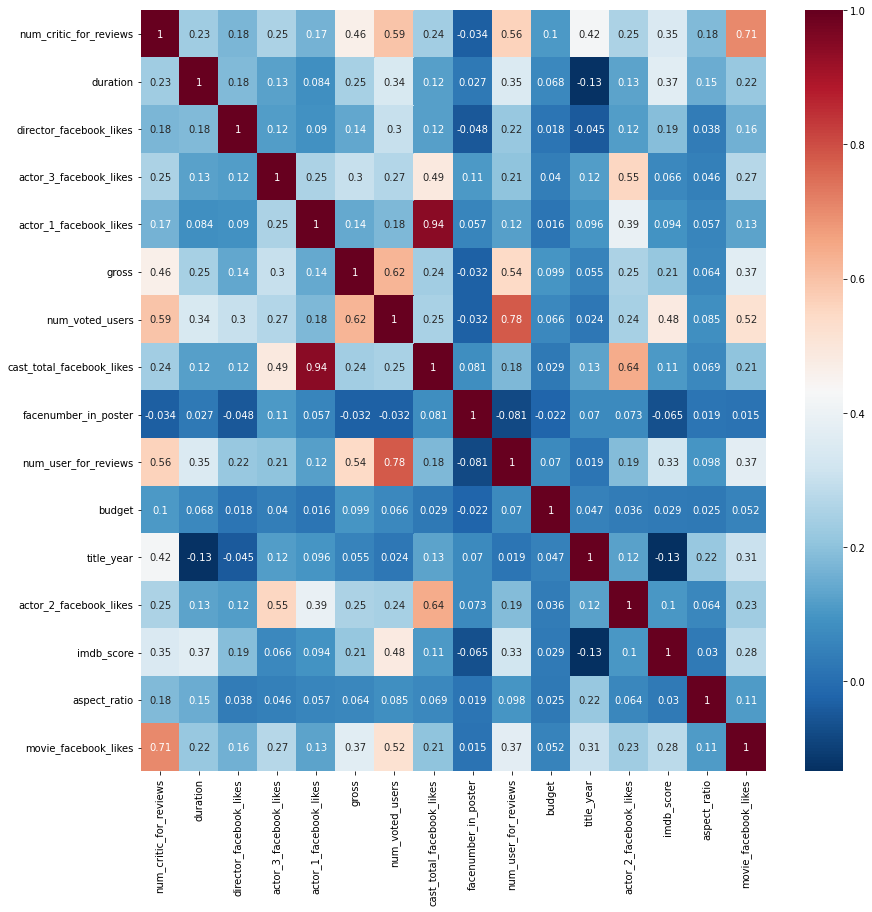

In [71]:
plt.figure(figsize=(14,14))
sn.heatmap(df.corr(), cmap='RdBu_r', annot=True)
plt.show()

#### According to the EDA performed, these features have no or the least impact on the movie ratings.Dropping these columns makes sense.

In [72]:
## dropping the insignificant columns
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

## Replacing string values with float values using LabelEncoder
  

In [73]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

In [74]:
df['country']=le.fit_transform(df['country'].values)

## Splitting the dataset into training and test set

In [75]:
y=df['imdb_score'].values

In [76]:
x=df.loc[:, df.columns != 'imdb_score'].values

In [77]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1395                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1425                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1002   
1                       563.0                  1000.0          1592   
2                         0.0                   161.0          1795   
3

In [78]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.3, random_state=0)

## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [103]:
predictions = lm.predict(X_test)
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

## R-square of the model
lm.score(X_test,Y_test)

Mean Absolute Error: 0.65 degrees.


0.36849096744735654

## Random Forest

In [81]:
randregressor=RandomForestRegressor(n_estimators=50)

In [82]:
randregressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [83]:
predictions = randregressor.predict(X_test)
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

## R-square of the model
randregressor.score(X_test,Y_test)

Mean Absolute Error: 0.52 degrees.


0.5713789082113359

(0.0, 10.0)

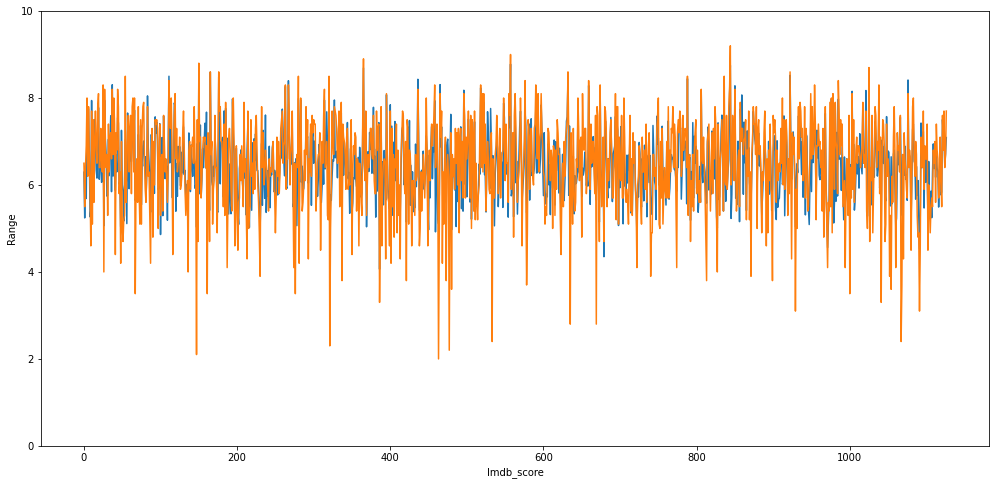

In [85]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

## Decision Tree

In [86]:
dr=DecisionTreeRegressor()

In [87]:
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [88]:
predictions = dr.predict(X_test)
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.71 degrees.


In [99]:
## R-square of the model
dr.score(X_test,Y_test)

0.19331676255665253

(0.0, 10.0)

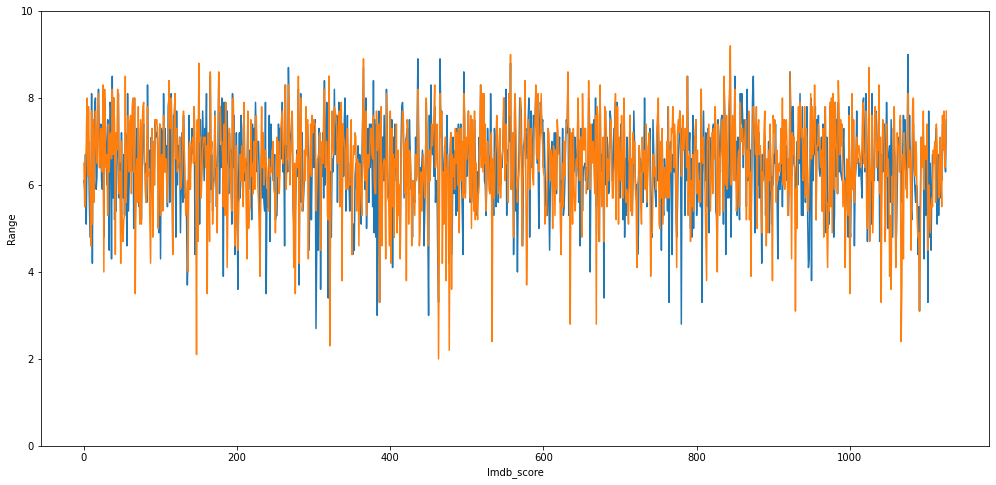

In [90]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

## Support Vector Machine

In [91]:
svm=SVR()
svm.fit(X_train,Y_train)

SVR()

In [100]:
predictions = svm.predict(X_test)
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

## R-square of the model
svm.score(X_test,Y_test)

Mean Absolute Error: 0.79 degrees.


0.07601374416027806

(0.0, 10.0)

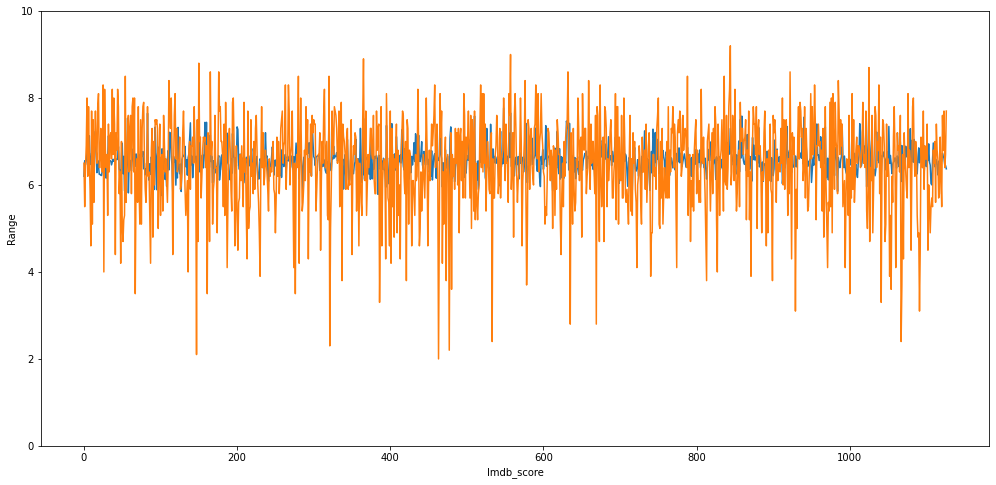

In [93]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

## XGBoost

In [94]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,Y_train)

[18:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=50)

In [101]:
predictions=xgboost.predict(X_test)
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

## R-square of the model
xgboost.score(X_test,Y_test)

Mean Absolute Error: 0.54 degrees.


0.5426020082445027

(0.0, 10.0)

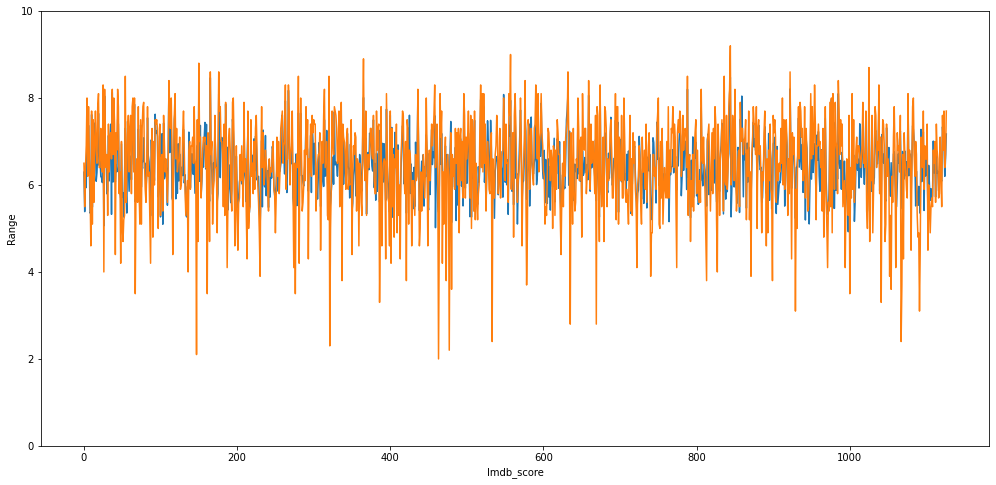

In [96]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)